## Imports and directory

In [ ]:
!pwd

/content


In [ ]:
! [ -e /content ] && pip install -Uqq fastai

In [ ]:
%reload_ext autoreload
# %autoreload 2
%matplotlib inline

In [ ]:
!pip install sentencepiece

In [ ]:
"Restart Runtime"
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [ ]:
from fastai.text.all import *
import sentencepiece as spm

import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloads and Path

In [ ]:
#!wget http://s3-us-west-2.amazonaws.com/fuse-ai-competiton/IMAGE_PUBLIC/data.zip
!cp "drive/My Drive/projektt/Fuse-AI-Competition/NLP/data.zip" ./

In [ ]:
ls

data.zip  drive/  sample_data/


In [ ]:
!unzip data.zip
#!rm data.zip

In [ ]:
ls

data/  data.zip  drive/  sample_data/


In [ ]:
path = Path('./data')
path.ls()

(#2) [Path('data/val'),Path('data/train')]

In [ ]:
(path/'train').ls()

(#42669) [Path('data/train/1545792628.0755336.txt'),Path('data/train/1545736943.610551.txt'),Path('data/train/1545737291.7775872.txt'),Path('data/train/1545733092.5528898.txt'),Path('data/train/1545587267.858434.txt'),Path('data/train/1545720484.7723072.txt'),Path('data/train/1545717575.417085.txt'),Path('data/train/1545880357.7434406.txt'),Path('data/train/1545904445.241019.txt'),Path('data/train/1545547646.4927096.txt')...]

## Data Cleaning

If csv file is messed up

In [ ]:
#!mv drive/My\ Drive/FuseAI/train.csv data/train/train.csv

In [ ]:
df= pd.read_csv(path/'train/train.csv')
print(df.head())
print(df.size)

                     data          label
0   1545750954.322638.txt       politics
1  1545845294.0791106.txt       politics
2  1545634211.7993875.txt        opinion
3  1545741044.8372166.txt       politics
4  1545520023.2846026.txt  entertainment
85334


In [ ]:
df.label.unique()

array(['politics', 'opinion', 'entertainment', 'literature', 'sports',
       'health'], dtype=object)

In [ ]:
# for _label in df.label.unique():
#   print(f'No. of {_label}: = {df[df.label ==_label].shape[0]}')
df.label.value_counts()

No. of politics: = 23188
No. of opinion: = 7831
No. of entertainment: = 5106
No. of literature: = 1834
No. of sports: = 3688
No. of health: = 1020


In [ ]:
df.dropna(subset=['data','label'], how='any', inplace=True)
print(df.size)

85334


iterative:
data = open_text(data)

here, open_text is fastai.text.open_text

In [ ]:
path/Path('train/')

Path('data/train')

In [ ]:
path/Path('train')/'1545792628.0755336.txt'
#(path/'train').ls()

Path('data/train/1545792628.0755336.txt')

In [ ]:
def open_text(fn, enc='utf-8'):
    "Read the text in `fn`."
    with open(fn,'r', encoding = enc) as f: return ''.join(f.readlines())
    
def _open_text(data):
  "Wrapper function for open_text to specify path"
  return open_text(path/Path('train')/data)

df.data = df.data.map(_open_text)

In [ ]:
df

,data,label
0,सम्पूर्ण घरपरिवारमा चर्पी निर्माणपछि पाँचथर जिल्लालाई खुला दिसामुक्त क्षेत्र घोषणा गरिएको छ । खुला दिसामुक्त क्षेत्र घोषणा सँगै पाँचथर खुला दिसामुक्त जिल्लामध्ये पूर्वाञ्चलमा पहिलो र नेपालमा बार्हौ जिल्ला भएको छ । आज एक समारोहको आयोजना गरी पाँचथरलाई खुला दिसामुक्त क्षेत्र घोषणा गरिएको हो । गाउँगाउँबाट आएका सर्वसाधारणले हर्षाेल्लास गर्दै बजार परिक्रमापछि जिविसको खुला मैदानमा पुगी कार्यक्रम आयोजना गरिएको हो । खानेपानी तथा सरसफाई सव डिभिजन प्रमुख अनिल केसरीले लामो प्रयत्नपछि जिल्लालाई खुला दिसामुक्त क्षेत्र घोषणा गर्नु आफैंमा उत्साहजनक कार्य भएको बताए । उनका अनुसार जिल्लाका तीन हजार एक सय ३७ ...,politics
1,"कांग्रेसको क्षेत्रीय समिति र महाधिवेशन प्रतिनिधि छनोटका लागि केही स्थानबाहेक अधिकांश क्षेत्रमा निर्वाचन भएको छ । सर्वसम्मत हुन नसकेपछि निर्वाचन भएको हो । पूर्वप्रधानमन्त्री एवं कांग्रेस सभापति सुशील कोइरालाको क्षेत्र ३ नम्बरको कोषाध्यक्षमा राजु सरदार सर्वसम्मत चयन भएका छन् । अन्य पदका लागि निर्वाचन भएको छ । क्षेत्रीय सभापतिमा सुरेन्द्र सापकोटा, राजु थापा र रमेश गुप्ता प्रतिस्पर्धामा छन् । १ सय ७९ मतदाता रहेको उक्त क्षेत्रको निर्वाचन सम्पन्न भइसकेको नेताहरूले बताएका छन् । त्यस्तै, क्षेत्र नम्बर २ मा सभापतिबाहेक अन्य पदमा सर्वसम्मत नेतृत्व चयन भएको छ । क्षेत्रीय कोषाध्यक्षमा जयधर श्रेष्ठ, सच...",politics
2,"नारायणगढदेखि मुग्लिनसम्म करिब ३६ किमिको दूरी पार गर्न अहिले सवारी साधनलाई पुरै एक दिन लाग्ने जुन अवस्था देखिएको छ, त्यसले राजमार्गमा यात्रा गर्ने हजारौं यात्रुलाई हैरानी मात्रै दिएको छ। दैनिक करिब ८ हजारभन्दा बढी सानाठूला सवारी साधन गुड्ने यो सडक खण्ड छिचोल्न एक घण्टा दस मिनेट मात्रै समय लाग्नुपर्ने हो। तर, अहिले यो सडक खण्ड छिचोल्न एक दिन नै लाग्ने अवस्था सिर्जना हुनु विडम्बनापूर्ण अवस्था हो। डेढ वर्ष अघिदेखि सुरु भएको नारायणगढ–मुग्लिन सडक खण्डको स्तरोन्नतिको काम नसकिएकाले पनि यस किसिमको विडम्बनापूर्ण अवस्था देखिएको हो। त्यसमाथि निरन्तर रूपमा परिरहेको पानीका कारण यो सडक खण्डमा पहिरो खस्न...",opinion
3,कपन गाविस–३ मिलनचोकका २५ वर्षीय चेतबहादुर खड्का रबरको चुङ्गी खेलेर विश्व कीर्तिमान कायम गर्न लागिपरेका छन् ।खड्काले आज यहाँ पत्रकार सम्मेलन गरी आफूले दुई घण्टाभित्र निरन्तर १२ हजारभन्दा बढी पटक नझारीकन दुवै खुट्टाले चुङ्गी उफार्न सक्ने बताउँदै विश्व कीर्तिमान कायम गर्ने दाबी गरे ।पत्रकार सम्मेलनमा उनले केही समय चुङ्गी खेलेर देखाएका थिए । खड्काले जसरी भएपनि आर्थिक सहयोग जुटाएर आफ्नो क्षमता प्रदर्शन गर्ने बताए ।,politics
4,"सुवर्ण थापा निर्देशित फिल्म फन्कोको बुधबार राजधानीको कुमारी हलमा प्रियिमर गरिएको छ । फिल्ममा दयाहाङ राई, सौगात मल्ल, अनुप बराल, प्रियकां कार्की, केकी अधिकारीको मुख्य भूमिका छ । माघ १ गतेदेखि हलमा रिलिज हुने फिल्मको प्रिमियर शो सेलिब्रेटीको जमघटस्थल बन्यो ।",entertainment
...,...,...
42662,"कान्तिपुरकर्मी माधब अर्याल पाल्पाको दोभान गाविसको ज्यामिरे, बेरुवामा सोमवार आयोजना गरिएको दालचिनी मिनी महोत्सवमा सम्मानित भएका छन् । दालचिनी र तेजपातलाई चिनाउन र दोभानको ज्यामिरेलाई ऋणमुक्त गाउँका रुपमा परिचय दिन सफल भएको भन्दै सम्मान गरेका हुन् ।हात्तीकोट सामुदायिक वन उपभोक्ता समुहका अध्यक्ष चन्द्रबहादुर सर्वुजामगर, जिल्ला वन कार्यालय पाल्पाका प्रमुख सुरेश सिंह, जिल्ला भुः संरक्षण कार्यालय पाल्पाका प्रमुख गोपाल पौडेलले अविर,। दोसल्ला, सम्मानपत्र दिए । अर्याल समेत गाउँले देउराली पत्रिकाका सम्पादक मेघराज शर्मा, जिल्ला वन कार्यालय तनहुँका प्रमुख रामबाबु पौडेल, सहायक जिल्ला वन अधिकृत कृष्ण प...",politics
42663,केही समयअघि मात्रै नायिका ऐश्वर्या राय बच्चन गर्भवती भएको समाचारले बलिउड तताएको मात्रै थिएन । उनले खेल्दै गरेको फिल्म 'हिरोइन'बाट अलग भइदिएपछि निर्माताहरू मारमा परेको भन्दै नायिकाप्रति असन्तोष व्यक्त गरेका थिए । अहिले बलिउड पुनः अर्की नायिका लारा दत्तको त्यस्तै समाचारले गर्माएको छ । मोडलिङ हुँदै अभिनय क्षेत्रमा प्रवेश गरेकी लाराको तस्बिरमा देखिएजस्तो आकर्षक शरीर केही समयका लागि देख्न पाइने छैन ।विभिन्न अड्कलबाजीका बीचमा उनले आफू गर्भवती भएको स्वीकार गरेकी हुन् । फिल्म 'अन्दाज'बाट बलिउडमा नायिकाका रूपमा देखा परेकी ३३ वषर्ीया लाराले साढे पाँच महिनाअघि भारतीय टेनिस खेलाडी महेश भूपतीसँग विवाह ...,entertainment
42664,"सिसुवार मैदानमा केही दिनयता मेला लागेजस्तो भएको छ। रंगीचंगी कागज टाँसेर झिलीमिली बनाइएको छ। ठाउँठाउँमा साना र सुन्दर गेट बनाइएका छन्। यो ठाउँमा युवायुवतीहरू दौरासुरुवाल र गुन्यूचोलीमा सजिएर दिनहुँ न

In [ ]:
df.dropna(subset=['data','label'], how='any', inplace=True)
print(df.size)

85334


In [ ]:
df.to_csv(path_or_buf=path/'train/train.csv', index=False)

##Nepali Tokenizer

This model file should be at path/../tokenizer/nepali_lm.model

In [ ]:
!mkdir tokenizer
!cp "drive/My Drive/Colab Notebooks/FuseAI/nepali_lm.model" tokenizer/

mkdir: cannot create directory ‘tokenizer’: File exists


In [ ]:
ls tokenizer/

nepali_lm.model


In [ ]:
class NepaliTokenizer(SentencePieceTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.special_toks=None; self.sp_model=None; self.vocab_sz=None; self.max_vocab_sz=60000;
        self.tok = spm.SentencePieceProcessor()
        self.tok.Load(str("tokenizer/nepali_lm.model"))
        
    def tokenizer(self, t:str): # -> List[str]:
        return self.tok.EncodeAsPieces(t)

*vocab_size* = 15000


In [ ]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/nepali_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(15000)]

In [ ]:
itos[:12]

['<unk>', '<s>', '</s>', '▁', 'को', '।', ',', 'मा', '▁।', '▁र', '.', 'ले']

In [ ]:
counter = Counter(itos)
nepali_vocab = make_vocab(counter, min_freq=0)
len(nepali_vocab)

15016

In [ ]:
tokenizer = Tokenizer(tok=NepaliTokenizer(lang='ne'))

In [ ]:
tokenizer.encodes('केही समयअघि मात्रै नायिका ऐश्वर्या राय बच्चन गर्भवती भएको समाचारले बलिउड तताएको मात्रै थिएन ।')

['▁',
 'x',
 'x',
 'b',
 'os',
 '▁केही',
 '▁समय',
 'अघि',
 '▁मात्रै',
 '▁नायिका',
 '▁ऐश्वर्य',
 'ा',
 '▁राय',
 '▁बच्चन',
 '▁गर्भवती',
 '▁भएको',
 '▁समाचार',
 'ले',
 '▁बलिउड',
 '▁त',
 'ता',
 'एको',
 '▁मात्रै',
 '▁थिएन',
 '▁।']

## Language Model





from df

Note: get_x is always 'text' for LM

In [ ]:
data_lm = DataBlock(blocks=TextBlock.from_df('data', is_lm=True, vocab=nepali_vocab, tok=tokenizer.tok),
                    get_x=ColReader('text'),
                    splitter=RandomSplitter(0.1, seed=42))
              
dls_lm = data_lm.dataloaders(df, bs=128, seq_len=72)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
dls_lm.show_batch(max_n=5)

,text,text_
0,"▁ x x b os ▁' म धे स का ▁नाममा ▁धो का ▁मात्र ▁भयो , ▁अन्य ▁समुदाय ले ▁त ▁सोझ ा सी धा ▁भनेर ▁हाम्रो ▁भावना मा ▁खेल वा ड ▁गरे कै ▁थिए , ▁तर ▁मधेसी ▁भन ाउँदा ▁पनि ▁उनीहरू भन्दा ▁कम ▁निस्के नन् , ' ▁सहिद ▁पिता ▁राजकुमार ▁राजवंशी ले ▁भने , ▁' आज ▁मेरा ▁छोरा को ▁बलिदान ▁ खेर ▁गए जस्तै ▁लागि रहेको ▁छ ▁। ' मोर ङ को","x x b os ▁' म धे स का ▁नाममा ▁धो का ▁मात्र ▁भयो , ▁अन्य ▁समुदाय ले ▁त ▁सोझ ा सी धा ▁भनेर ▁हाम्रो ▁भावना मा ▁खेल वा ड ▁गरे कै ▁थिए , ▁तर ▁मधेसी ▁भन ाउँदा ▁पनि ▁उनीहरू भन्दा ▁कम ▁निस्के नन् , ' ▁सहिद ▁पिता ▁राजकुमार ▁राजवंशी ले ▁भने , ▁' आज ▁मेरा ▁छोरा को ▁बलिदान ▁ खेर ▁गए जस्तै ▁लागि रहेको ▁छ ▁। ' मोर ङ को ▁कट"
1,"▁पनि ▁संस्कार , ▁संस्कृति समेत ▁विविधता ▁छ ▁। ’ ▁भर खर ै ▁गठन ▁भएको ▁भाषा ▁आयोग का ▁निम्ति ▁यो ▁शोध मूलक ▁सामग्री ले ▁संघीय ▁प्रदेश – xxunk ▁मा ▁बोलिन े ▁भाषा हरुको ▁अध्ययन ▁गर्न ▁सन्दर्भ ▁स्रोत ▁हुनसक्ने ▁राई ले ▁बताए ▁। ▁किरात ▁जाति भित्र ▁राई , ▁लिम्बु , ▁या क ्खा ▁र ▁सुनुवार ▁पर्दछन् ▁। ▁किराती ले ▁आफूलाई ▁प्रकृति ▁र ▁पितृ पू ज क ▁ठान्दछ न् ▁। ▁उनीहरु ले ▁बोल्ने ▁बोलि चा","▁संस्कार , ▁संस्कृति समेत ▁विविधता ▁छ ▁। ’ ▁भर खर ै ▁गठन ▁भएको ▁भाषा ▁आयोग का ▁निम्ति ▁यो ▁शोध मूलक ▁सामग्री ले ▁संघीय ▁प्रदेश – xxunk ▁मा ▁बोलिन े ▁भाषा हरुको ▁अध्ययन ▁गर्न ▁सन्दर्भ ▁स्रोत ▁हुनसक्ने ▁राई ले ▁बताए ▁। ▁किरात ▁जाति भित्र ▁राई , ▁लिम्बु , ▁या क ्खा ▁र ▁सुनुवार ▁पर्दछन् ▁। ▁किराती ले ▁आफूलाई ▁प्रकृति ▁र ▁पितृ पू ज क ▁ठान्दछ न् ▁। ▁उनीहरु ले ▁बोल्ने ▁बोलि चा ली"
2,' ▁मा ▁उनका ▁केही ▁सिर्जना ▁समेटिए का ▁छन् ▁। ▁यति ▁बेला ▁भने ▁बालबालिका का ▁साथी ▁बनेर ▁पाठक मा झ ▁आएका ▁छन् ▁। उनको ▁बालक था ▁संग्रह ▁' जु ँग े ▁दाइ को ▁जु क्ति ' ▁बजारमा ▁आएको ▁छ ▁। सञ्चार कर्मी ▁गंगा ▁बीस ी ▁कुनै ▁बेला ▁कविता ▁लेख ्थे ▁। ▁संयुक्त ▁कविता ▁संग्रह ▁' मौसम का ▁हरफ हरू ' ▁मा ▁उनका ▁केही ▁सिर्जना ▁समेटिए का ▁छन् ▁। ▁यति ▁बेला ▁भने ▁बालबालिका का,▁मा ▁उनका ▁केही ▁सिर्जना ▁समेटिए का ▁छन् ▁। ▁यति ▁बेला ▁भने ▁बालबालिका का ▁साथी ▁बनेर ▁पाठक मा झ ▁आएका ▁छन् ▁। उनको ▁बालक था ▁संग्रह ▁' जु ँग े ▁दाइ को ▁जु क्ति ' ▁बजारमा ▁आएको ▁छ ▁। सञ्चार कर्मी ▁गंगा ▁बीस ी ▁कुनै ▁बेला ▁कविता ▁लेख ्थे ▁। ▁संयुक्त ▁कविता ▁संग्रह ▁' मौसम का ▁हरफ हरू ' ▁मा ▁उनका ▁केही ▁सिर्जना ▁समेटिए का ▁छन् ▁। ▁यति ▁बेला ▁भने ▁बालबालिका का ▁साथी
3,"▁याउन ▁श्रम ▁र ▁चन्द ा दान ▁गरेका ▁गाउँ ले लाई ▁वर्षका ▁ xxunk ▁महिना ▁सडक ▁बन्द ▁हुँदा ▁श्रम ▁र ▁लगानी ▁ खेर ▁गएको ▁छ ▁। ▁‘ बाट ो ▁आएपछि ▁धेरै ▁सुविधा ▁पाइए ला ▁भनेर ▁श्रम ▁र ▁भए भर को ▁पैसा ▁लगानी ▁गरियो , ’ ▁क्या ङ का ▁अगुवा ▁न र्स िङ ▁पुन ले ▁भने , ▁‘ जे ठ ▁न लाग ्दै ▁ठाउँ ठाउँमा ▁प हि रा ले ▁सडक ▁बन्द ▁भएपछि ▁एक ▁दिन","▁श्रम ▁र ▁चन्द ा दान ▁गरेका ▁गाउँ ले लाई ▁वर्षका ▁ xxunk ▁महिना ▁सडक ▁बन्द ▁हुँदा ▁श्रम ▁र ▁लगानी ▁ खेर ▁गएको ▁छ ▁। ▁‘ बाट ो ▁आएपछि ▁धेरै ▁सुविधा ▁पाइए ला ▁भनेर ▁श्रम ▁र ▁भए भर को ▁पैसा ▁लगानी ▁गरियो , ’ ▁क्या ङ का ▁अगुवा ▁न र्स िङ ▁पुन ले ▁भने , ▁‘ जे ठ ▁न लाग ्दै ▁ठाउँ ठाउँमा ▁प हि रा ले ▁सडक ▁बन्द ▁भएपछि ▁एक ▁दिन ▁हिँडे"
4,"▁ ( रि पो जि ट री ▁अफ ▁न ले ज ) ▁सम्म ▁पुग्ने ▁र ▁पुर् ▁याउने ▁भाषा ▁कुन ▁हो ▁भन्ने ▁मूल ▁प्रश्न ▁हो ▁। ▁नेपाली ▁भाषामा ▁संसार ले ▁विकसित ▁गरेका ▁र ▁खासगरी ▁राज्य ▁सञ्चालन ▁र ▁विकासका ▁लागि ▁उपयोगी , ▁अझै ▁भन ौं ▁अत्यावश्यक ीय ▁ज्ञान ▁नेपाली ▁भाषा मै ▁उपलब्ध ▁छ ▁त ▁? ▁नेपाली मा ▁कुन ▁त्यस्ता ▁प्रकाशन ▁अथवा ▁स्रोत ▁छन् , ▁जसले ▁यस्तो ▁वैज्ञानिक , ▁आर्थिक , ▁प्राविधिक , ▁प्रशासनिक ▁वा","( रि पो जि ट री ▁अफ ▁न ले ज ) ▁सम्म ▁पुग्ने ▁र ▁पुर् ▁याउने ▁भाषा ▁कुन ▁हो ▁भन्ने ▁मूल ▁प्रश्न ▁हो ▁। ▁नेपाली ▁भाषामा ▁संसार ले ▁विकसित ▁गरेका ▁र ▁खासगरी ▁राज्य ▁सञ्चालन ▁र ▁विकासका ▁लागि ▁उपयोगी , ▁अझै ▁भन ौं ▁अत्यावश्यक ीय ▁ज्ञान ▁नेपाली ▁भाषा मै ▁उपलब्ध ▁छ ▁त ▁? ▁नेपाली मा ▁कुन ▁त्यस्ता ▁प्रकाशन ▁अथवा ▁स्रोत ▁छन् , ▁जसले ▁यस्तो ▁वैज्ञानिक , ▁आर्थिक , ▁प्राविधिक , ▁प्रशासनिक ▁वा ▁सामाजिक"


In [ ]:
awd_lstm_config = awd_lstm_lm_config.copy()
awd_lstm_config['n_hid'] = 1150

In [ ]:
learn = language_model_learner(dls_lm, arch=AWD_LSTM, metrics=[accuracy, Perplexity()], drop_mult=0.3, wd=0.1, config=awd_lstm_config, pretrained=False)

In [ ]:
learn = learn.to_fp16()

Minimum/10: 1.20e-02, steepest point: 1.10e-02


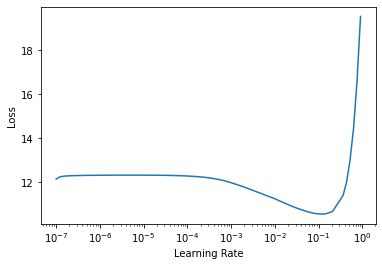

In [ ]:
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,5.970928,5.816848,0.153602,335.911682,20:47


In [ ]:
learn.save_encoder('encoder_lm')

In [ ]:
learn.load_encoder('encoder_lm')

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,5.305792,5.224302,0.198230,185.731445,17:52
1,5.205091,4.985570,0.221910,146.286926,18:06


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(6, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.850916,4.720701,0.242991,112.246880,21:15
1,4.526738,4.437027,0.268855,84.523315,21:13
2,4.384849,4.268972,0.284037,71.448174,20:44
3,4.222637,4.083294,0.304855,59.340611,20:49
4,4.071650,3.912708,0.324242,50.034241,21:06
5,3.977839,3.844993,0.332475,46.758350,21:15


In [ ]:
learn.save_encoder('encoder_lm_fastai2')

In [ ]:
learn.load_encoder('encoder_lm_fastai2')

In [ ]:
!cp ./models/encoder_lm_fastai2.pth "drive/My Drive/Colab Notebooks/FuseAI/"

In [ ]:
learn

In [ ]:
learn.freeze()
learn.export('learn_lm_fastai2.pkl')
!cp learn_lm_fastai2.pkl "drive/My Drive/Colab Notebooks/FuseAI/"

DIRECTLY LOAD ENCODER (Models + Weights) !!!

In [ ]:
!cp drive/My\ Drive/Colab\ Notebooks/FuseAI/learn_lm_fastai2.pkl ./
learn = load_learner(fname = 'learn_lm_fastai2.pkl')

In [ ]:
learn.predict('करिब',n_words=30)

"▁ x x b os ▁करिब ▁ ▁बनारस को ▁क्याम्पस ▁' वन ▁युरोपमा ▁' बाहिर ▁हुदै ▁आएको ▁जस्तो ' ▁व्यवस्था ▁थियो ▁। ▁प्रान्त ीय ▁पदाधिकारी ▁तथा ▁मञ्च कै ▁पनि ▁समकालीन ▁सदस्य ▁तराईमा ▁नाम ▁निकाल्न ▁र ▁बदल"

In [ ]:
TEXT = "करिब"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]
print("\n".join(preds))

## Classifier

bs=64 ~> 13GB VRAM

In [ ]:
data_classification = DataBlock(blocks=(TextBlock.from_df('data', seq_len=72, vocab=nepali_vocab, tok=tokenizer.tok), CategoryBlock), # vocab=dls_lm.vocab
                      get_x=ColReader('text'),
                      get_y=ColReader('label'),
                      splitter=RandomSplitter(0.1, seed=42))
dls = data_classification.dataloaders(df, bs=64)
# dls.summary(df, bs=64)  # Verbose
dls.show_batch()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"▁ x x b os ▁अनि ल ▁मण्डल ले ▁शतक ▁बनाउनु का ▁साथै ▁कप्तान ▁पारस ▁खड्का ले ▁ xxunk ▁विकेट ▁लिएपछि ▁आई सी सी ▁व ल् र्ड ▁क्रिकेट ▁लिग ▁डिभिजन - xxunk ▁मा ▁नेपालले ▁आइतबार ▁डेनमार्क लाई ▁हराएको ▁छ ▁। ▁वर्षा ले ▁प्रभावित ▁खेलमा ▁नेपालले ▁डेनमार्क माथि ▁ डक व र्थ ▁ ले वि स ▁प्रणाली अनुसार ▁ xxunk ▁र न को ▁जित ▁निकाल ्यो ▁। नेपाली ▁टिमले ▁अन्तर्राष्ट्रिय ▁क्रिकेटमा ▁लगातार ▁पाँच ▁जित ▁निकालेर ▁नयाँ ▁कीर्तिमान ▁पनि ▁बनायो ▁। ▁लिगमा ▁अप राज ित ▁नेपालले ▁सोमबार ▁फाइनलमा ▁अमेरिकाको ▁सामना ▁गर्दै छ ▁। ▁' अ ब ▁मलेसिया ▁यात्रा मा ▁एक ▁खु ड् क िलो ▁बाँकी ▁छ , ' ▁कप्तान ▁पारस ले ▁भने , ▁' अमेरिका लाई ▁हराए र ▁च्याम्पियन ▁बन्दै ▁घर ▁ र्फ कन ▁चाहन्छ ौं ▁। ' ▁अमेरिका ▁सिंगापुर लाई ▁व ष र् ाले ▁प्रभावित ▁खेलमा ▁ डक व र्थ ▁ ले वि स ▁प्रणाली अनुसार ▁ xxunk ▁र न ले",sports
1,"▁ x x b os ▁मैले ▁केही ▁वर्ष ▁पहिले ▁‘ किन ▁मर् छन् ▁कम्युनिस्ट ▁पार्टी हरू ▁? ’ ▁शीर्षक मा ▁कान्तिपुर ▁दैनिक मा ▁एउटा ▁लेख ▁लेखेको ▁थिए ँ ▁। ▁त्यो ▁तत्कालीन ▁नेकपा ▁माओवादी मा ▁गहिर िँदै ▁गरेका ▁सङ्कट का ▁सैद्धान्तिक ▁र ▁सा ङ्ग ठ निक ▁कारण ▁एवं ▁सम्भाव ्य ▁परिणाम बारे ▁थियो ▁। गत ▁वैशाख सम्म ▁लोकप्रियता को ▁शिखर ▁चढ ्दै ▁गरेको ▁नेपाल ▁कम्युनिस्ट ▁पार्टी ▁ ( ने क पा ) ▁किन ▁ओराल ो ▁लाग ्दै ▁गयो ▁भन्ने ▁चर्चा ▁अहिले को ▁मुख्य ▁राजनीतिक – बौद्ध िक ▁वि म र्श ▁भएको ▁छ ▁। ▁यो ▁लेख ▁आज को ▁नेकपा का ▁सन्दर्भमा ▁तर ▁पाँच ▁वर्ष ▁पहिले को ▁लेख कै ▁अर्को ▁क डी ▁हो ▁। ▁दो बाट ो मा ▁नेकपा ▁प्राचीन ▁युनान ी ▁मिथक का ▁दुई ▁पात्र बाट ▁छलफल ▁सुरु ▁गर ौं ▁। ▁एउटा ▁पात्र ▁ना र् सिस स् ▁हो , ▁जसको ▁जिन्दगी का ▁अ पार ▁सम्भावना ▁छन् , ▁तर ▁एउटा ▁श्राप ले ▁गर्दा",opinion
2,"▁ x x b os ▁हत्या , ▁अपहरण , ▁धम्की लगायतका ▁घटना ले ▁मधेस का ▁सीमावर्ती ▁पर्सा देखि ▁सप्तरी सम्मको ▁क्षेत्र ▁ ( प्रदेश ▁नम्बर ▁ xxunk ▁का ▁आठ ▁जिल्ला ) ▁अपराध को ▁अ ख डा ▁बनेको ▁छ ▁। ▁लामो ▁समयदेखि ▁हुँदै ▁आएका ▁यस्ता ▁घटना ▁रोक्न ▁सरकार लाई ▁पनि ▁उत्तिक ै ▁चुनौती ▁छ ▁। सर ्ला ही ▁हेम पुर ▁ xxunk ▁का ▁ xxunk ▁वर्षीय ▁एमाले ▁नेता ▁राम नर ेश ▁यादव को ▁ गत ▁पुस ▁ xxunk ▁मा ▁हत्या ▁भयो ▁। ▁गाविस का ▁पूर्व अ ध्यक्ष समेत ▁रहेका ▁जिल्ला ▁कमिटी ▁सदस्य ▁यादव ▁‘ म र्न िङ ▁वा क ’ ▁गर्दै ▁घरबाट ▁केही ▁पर ▁पुगेका ▁बेला ▁एक ▁समूह ले ▁नियन्त्रणमा ▁लिई ▁आँखा मा ▁खुर्सानी को ▁धूलो ▁छ र्क ेर ▁धार िलो ▁हतियार ▁प्रहार ▁गरी ▁हत्या ▁गर् ▁यो ▁। ▁हत्या ▁आरोप मा ▁सोही ▁ठाउँ का ▁ xxunk ▁वर्षीय ▁उ म ेश ▁राय ▁यादव , ▁ xxunk ▁वर्षीय ा ▁ मञ्जु देवी ▁यादव",politics
3,"▁ x x b os ▁दुई ▁करोड ▁ xxunk ▁लाख ▁नेपाली मध्ये ▁ xxunk ▁करोड ▁ xxunk ▁लाख ले ▁मोबाइल ▁फोन ▁प्रयोग ▁गर्छन् ▁। ▁यस बाट ▁प्रस्ट ▁हुन्छ , ▁प्रविधि ▁र ▁नेपाली ▁बीचको ▁अन्तर निर् भर ता ▁। ▁सस्तो ▁होस् ▁या ▁महँगो ▁आज ▁विश्वभरि का ▁मानव जाति को ▁पल पल को ▁साथी ▁बनेको ▁छ - ▁नयाँ ▁प्रविधि ▁। ▁यस बाट ▁नेपाली ▁समाज ▁पनि ▁अ छ ू तो ▁रहने ▁कुर ै ▁भएन ▁। ▁किनभने ▁विश्व ▁उपभोक्ता वादी ▁समाजको ▁सञ्जाल मा ▁नेपाल ▁पर िसकेको ▁छ ▁। ▁सूचना ▁र ▁प्रविधि का ▁कारण ▁' विश्व ▁एक ▁गाउँ ' मा ▁रूपान्तर ित ▁भएको ▁यस ▁शताब्दीमा ▁प्रवेश ▁गरेका ▁नेपाली हरू ▁विज्ञान ▁/ ▁प्रविधि का ▁उपभोग ्य ▁सामग्री ▁बाह्य ▁मुलुक बाट ▁कि न्छन् ▁मात्र , ▁निर्माण ▁गर्न सक्ने ▁क्षमता ▁विकास मा ▁भने ▁पछि ▁नै ▁छन् ▁। ▁किनभने ▁नागरिक लाई ▁आवश्यक ▁स - साना ▁प्राविधिक ▁सामान समेत ▁हामी कहाँ ▁बन्दै नन् ▁। ▁कारण - ▁हामी ▁विज्ञान ▁र ▁प्रविधि",opinion
4,"▁ x x b os ▁नेकपा ▁एमाले ▁र ▁माओवादी ▁केन्द्र बीच ▁एकता को ▁चर्चा ले ▁अहिले ▁नेपाली ▁राजनीतिमा ▁चासो ▁राख्ने ▁दुनियाँ ▁वि स्मि त ▁छ ▁। ▁माओवादी ▁केन्द्र को ▁डो ली ▁चढे र ▁नयाँ ▁सरकारको ▁नजिकै ▁पुगेको ▁नेपाली ▁काङ्ग्रेस का ▁नेताहरू ले ▁अहिले ▁सुरु ▁भएको ▁कम्युनिस्ट ▁एकता ▁प्रक्रिया बारे ▁विभिन्न ▁प्रतिक्रिया ▁दिनु ▁स्वाभाविक ▁हो ▁। ख्या त नाम ▁चिन्तक ▁प्रदीप ▁गिरी जीले ▁समेत ▁‘ प्रचण्ड को ▁आखिर ी ▁चमत्कार ’ ▁भनेर ▁टिप्पणी ▁गरेपछि ▁यस ▁घटना ले ▁ठूल ै ▁वि स् मय ▁उत्पन्न ▁गरेको ▁अझ ▁स्पष्ट ▁छ । ▁हुन ▁पनि ▁यस ▁घटना का ▁वि स् मय कारी , ▁नाटकीय , ▁अप्रत्या सित ▁पक्षहरू ▁छन् । ▁एउटा ▁‘ जन युद्ध ’ ▁हुँदै ▁र क्ता म्य ▁इतिहास ▁र ▁त्यसका ▁कथा – व्य था ▁बोकेर ▁आएको ▁छ , ▁त्यस ले ▁बनाएको ▁दृष्टिकोण ▁र ▁मनोविज्ञान ▁छ । ▁अर्को चा हि ं ँ ▁‘ शान्ति पूर्ण ’ ▁संसदीय ▁उतार – च ढा व , ▁हार –",opinion
5,"▁ x x b os ▁झापा , ▁सुनसरी ▁र ▁मोरङ का ▁सर्वसाधारण को ▁मनमा ▁के ▁चल्दै ▁छ ▁? ▁जाँच ्न , ▁सोध ्न ▁कसै ले ▁प्रयत्

In [ ]:
awd_lstm_config = awd_lstm_lm_config.copy()
awd_lstm_config['n_hid'] = 1150

del awd_lstm_config['tie_weights']
del awd_lstm_config['out_bias']

In [ ]:
learn = text_classifier_learner(dls, arch=AWD_LSTM, drop_mult=0.5, metrics=accuracy, config=awd_lstm_config, pretrained=False).to_fp16()

In [ ]:
!mkdir data/models/
!cp drive/My\ Drive/Colab\ Notebooks/FuseAI/encoder_lm_fastai2.pth  models/
learn.load_encoder('encoder_lm_fastai2')

#Load Pretrained:
# !mkdir models/
# !cp drive/My\ Drive/Colab\ Notebooks/FuseAI/final-NLP-Fastai2.pth models/ 
# learn.load('final-NLP-Fastai2')

mkdir: cannot create directory ‘models/’: File exists


Minimum/10: 3.02e-02, steepest point: 1.58e-02


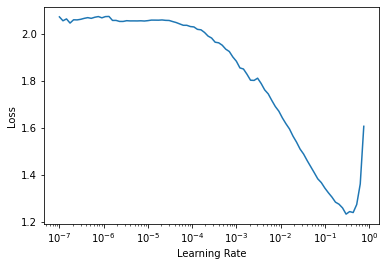

In [ ]:
learn.freeze()

lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.loss_func.func

CrossEntropyLoss()

In [ ]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.515169,0.274445,0.942335,06:02


In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.404675,0.239550,0.950774,07:22


In [ ]:
learn.save('who-cares')
learn.load('who-cares')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, 1e-3) # cbs=[SaveModelCallback(monitor='accuracy', fname='who-cares')]

epoch,train_loss,valid_loss,accuracy,time
0,0.341912,0.216726,0.939991,16:26
1,0.260557,0.219774,0.943038,16:37
2,0.200924,0.187172,0.948429,16:35
3,0.133952,0.179694,0.952414,16:35
4,0.074283,0.186651,0.952180,16:36


In [ ]:
learn.save('final-NLP-Fastai2')
learn.load('final-NLP-Fastai2')

Path('models/final-NLP-Fastai2.pth')

In [ ]:
learn.fit_one_cycle(1, 1e-3, cbs=[SaveModelCallback(monitor='accuracy', fname='final-NLP-Fastai2')])

epoch,train_loss,valid_loss,accuracy,time
0,0.116197,0.099373,0.973277,16:20


Better model found at epoch 0 with accuracy value: 0.9732770919799805.


In [ ]:
learn.save('final-NLP-Fastai2')

In [ ]:
!cp models/final-NLP-Fastai2.pth drive/My\ Drive/Colab\ Notebooks/FuseAI/
#!mkdir models/
#!cp drive/My\ Drive/Colab\ Notebooks/FuseAI/final-NLP-Fastai2.pth models/ 
#learn.load('final-NLP-Fastai2')

In [ ]:
learn.predict('कान्तिपुरकर्मी माधब अर्याल पाल्पाको दोभान गावि')

('politics',
 tensor(4),
 tensor([1.2364e-05, 7.5497e-04, 6.6353e-05, 6.3102e-03, 9.9285e-01, 1.4809e-06]))

In [ ]:
learn.predict('नेपालीहरुले तरुल, तीलेको लड्डु र सागपात जस्ता')

('opinion',
 tensor(3),
 tensor([1.4739e-01, 1.0188e-02, 1.0698e-02, 8.3027e-01, 1.0004e-03, 4.5401e-04]))

## Free Memory

In [ ]:
"Restart Runtime"
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
  
restart_runtime()

You may have to restart your kernel and come back to this stage if you run out of memory, and may also need to decrease `bs`.

In [ ]:
!nvidia-smi

Tue Dec 31 20:10:08 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    40W / 250W |  16279MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
del learn
gc.collect()

996

In [ ]:
!ps -aux|grep python

root          18  0.3  0.8 411616 106788 ?       Sl   15:03   1:08 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
root         127 70.9 42.7 39850168 5704272 ?    Ssl  15:04 216:46 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-0a2ddad0-2a52-482e-bdcd-7ec489738b7e.json
root        3878  0.0  0.0  39192  6444 ?        S    20:10   0:00 /bin/bash -c ps -aux|grep python
root        3880  0.0  0.0  38572  5008 ?        S    20:10   0:00 grep python


In [ ]:
!kill -9 3308

In [ ]:
!nvidia-smi

Wed Sep 11 04:24:53 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    26W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Since we ended the process, Reloading the DataBunch

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
import pandas as pd

path = Path('./data')
learn.path = path
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + "Object deletion/"

df= pd.read_csv(path/'train/train.csv')

path_img =Path(path/'train')
fnames = get_image_files(path_img)

img = open_image(path_img/Path(df.data[0]))
src_size = np.array(img.shape[1:])

## Export Learner

In [ ]:
learn = learn.to_fp32()
learn.freeze()
learn.export('final-NLP-fastai2-learner.pkl')

In [ ]:
# learn.summary()

In [ ]:
learn.path

Path('.')

In [ ]:
path.ls()

(#2) [Path('data/val'),Path('data/train')]

In [ ]:
!cp models/final-NLP-Fastai2.pth drive/My\ Drive/Colab\ Notebooks/FuseAI/
!cp final-NLP-fastai2-learner.pkl drive/My\ Drive/Colab\ Notebooks/FuseAI/

## Straight Training for New Session

Imports and Downloads

In [ ]:
! [ -e /content ] && pip install -Uqq fastai
!pip install sentencepiece

%reload_ext autoreload
# %autoreload 2
%matplotlib inline

from fastai.text.all import * 
import sentencepiece as spm

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

#!wget http://s3-us-west-2.amazonaws.com/fuse-ai-competiton/IMAGE_PUBLIC/data.zip
!cp "drive/My Drive/projektt/Fuse-AI-Competition/NLP/data.zip" ./
!unzip data.zip

path = Path('./data')

Data Cleaning

In [ ]:
df= pd.read_csv(path/'train/train.csv')

def open_text(fn, enc='utf-8'):
    "Read the text in `fn`."
    with open(fn,'r', encoding = enc) as f: return ''.join(f.readlines())

def _open_text(data):
  "Wrapper function for open_text to specify path"
  return open_text(path/Path('train')/data)

df.data = df.data.map(_open_text)

Tokenizer and Language Model

In [ ]:
# Load Tokenizer
!mkdir tokenizer
!cp "drive/My Drive/Colab Notebooks/FuseAI/nepali_lm.model" tokenizer/

class NepaliTokenizer(SentencePieceTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.special_toks=None; self.sp_model=None; self.vocab_sz=None; self.max_vocab_sz=60000;
        self.tok = spm.SentencePieceProcessor()
        self.tok.Load(str("tokenizer/nepali_lm.model"))

# Load Vocab
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/nepali_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(15000)]

counter = Counter(itos)
nepali_vocab = make_vocab(counter, min_freq=0)
tokenizer = Tokenizer(tok=NepaliTokenizer(lang='ne'))

# Load Language Model Enconder
!cp drive/My\ Drive/Colab\ Notebooks/FuseAI/learn_lm_fastai2.pkl ./
learn = load_learner(fname = 'learn_lm_fastai2.pkl')

Load pre-trained arch and weights

In [ ]:
!mkdir models/
!cp drive/My\ Drive/Colab\ Notebooks/FuseAI/final-NLP-Fastai2.pth models/ 

Train

In [ ]:
data_classification = DataBlock(blocks=(TextBlock.from_df('data', seq_len=72, vocab=nepali_vocab, tok=tokenizer.tok), CategoryBlock),
                      get_x=ColReader('text'),
                      get_y=ColReader('label'),
                      splitter=RandomSplitter(0.1, seed=42))

dls = data_classification.dataloaders(df, bs=64)

awd_lstm_config = awd_lstm_lm_config.copy()
awd_lstm_config['n_hid'] = 1150

del awd_lstm_config['tie_weights']
del awd_lstm_config['out_bias']

learn = text_classifier_learner(dls, arch=AWD_LSTM, drop_mult=0.5, metrics=accuracy, config=awd_lstm_config, pretrained=False)

learn.load('final-NLP-Fastai2')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1, 1e-3, cbs=[SaveModelCallback(monitor='accuracy', fname='final-NLP-Fastai2')])

Predict

In [ ]:
text = open_text('/content/drive/My Drive/Colab Notebooks/FuseAI/1545494580.8346913.txt')
pred = learn.predict(text)
print(pred[0])

entertainment


## Inference time

In [ ]:
"Restart Runtime"
import os

def restart_runtime():
  os.kill(os.getpid(), 9)

restart_runtime()

In [ ]:
! [ -e /content ] && pip install -Uqq fastai
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.text.all import SentencePieceTokenizer, load_learner
# from fastai.text.transform import Vocab
# from fastai.callbacks.hooks import load_learner
import sentencepiece as spm
  
path_to_learner = '/content/drive/My Drive/Colab Notebooks/FuseAI'

#sp = spm.SentencePieceProcessor()
#sp.Load(f'{path}nepali_lm.model')
#itos = [sp.IdToPiece(int(i)) for i in range(15000)]
#nepali_vocab = Vocab(itos)

def open_text(fn, enc='utf-8'):
    "Read the text in `fn`."
    with open(fn,'r', encoding = enc) as f: return ''.join(f.readlines())
  
class NepaliTokenizer(SentencePieceTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.special_toks=None; self.sp_model=None; self.vocab_sz=None; self.max_vocab_sz=60000;
        self.tok = spm.SentencePieceProcessor()
        self.tok.Load(str("tokenizer/nepali_lm.model"))
        
    def tokenizer(self, t:str): # -> List[str]:
        return self.tok.EncodeAsPieces(t)

learn = load_learner(fname = path_to_learner+'/final-NLP-fastai2-learner.pkl')
text = open_text('/content/drive/My Drive/Colab Notebooks/FuseAI/1545494580.8346913.txt')
pred = learn.predict(text)
print(pred[0])

entertainment
